Guía 6: Introducción a pandas

Ingeniería en Estadística, Universidad de Valparaíso

Profesor: Eduardo Jorquera - eduardo.jorquera@postgrado.uv.cl

Recuerdas lo que son los paquetes en Python? son módulos llenos de funciones que te permiten trabajar en tareas más específicas. Hay uno llamado pandas, el cual es bastante útil para manipular datos.

Recuerda, la forma básica para llamar al paquete de pandas (como a cualquier otro) es:

In [1]:
import pandas

Esta guía está orientada a los "dataframes", que traducido literalmente puede entenderse como un "encuadrado de datos". Éstos tienen una estructura elemental:

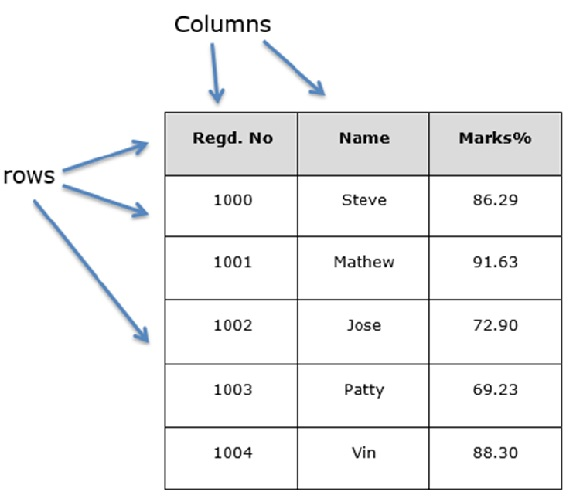

Para estar familiarizados con el lenguaje, row es fila, y column es columna.

Una consideración importante al momento de trabajar con paquetes (como pandas), es que una vez cargado el paquete, para cualquier uso posterior será suficiente el uso directo:

In [ ]:
pandas.DataFrame( data, index, columns, dtype, copy)

Lo que ves allí arriba es la forma básica de cómo crear un dataframe con pandas, donde cada argumento quiere decir lo siguiente:
* data: los datos pueden tomar varias formas,  como arreglos de numpy, series, listas, diccionarios, etc.
* index: para la etiqueta de las filas, Index es usada para la planilla resultante de datos. La opción por defecto toma np.arrange(n) si la indexación no es ingresada.
* columns: Para las etiquetas de la columna, la sintaxis opcional por defecto es np.arrange(n). Esto es verdadero sólo si ninguna indexación es ingresada.
* dtype: El tipo de dato para cada columna.
* copy: este comando es usado para copiar los datos, si la opción por defecto es False.

Un dataframe de pandas puede ser creado usando varios inputs, tales como
* Listas
* diccionarios
* Series
* ndarrays de numpy
* Otro dataframe

A continuación veremos algunos ejemplos de cómo crear dataframes usando estos inputs.

# Crear un dataframe vacío

Un dataframe vacío es un dataframe básico que puede ser creado

In [3]:
#import the pandas library and aliasing as pd
import pandas as pd
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


# Crear un dataframe desde una lista

El dataframe puede ser creado usando una sola lista o usando varias listas.

In [5]:
import pandas as pd
data = [1,2,3,4,5]
df = pd.DataFrame(data)
print(df)

   0
0  1
1  2
2  3
3  4
4  5


In [6]:
import pandas as pd
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print (df)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


In [7]:
import pandas as pd
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
print (df)

     Name   Age
0    Alex  10.0
1     Bob  12.0
2  Clarke  13.0


# Crear un dataframe desde un diccionario de ndarrays (arreglos)/listas

Todos los ndarrays deben ser del mismo largo. Si la indexación es ingresada, entonces el largo de los índices deben ser iguales al largo de los arreglos.

Si la indexación no es ingresada, entonces por defecto, la indexación será `range(n)`, donde `n` es el largo del arreglo.

Ejemplo 1:

(observe los valores 0,1,2,3. Éstos son  la indexación default que cumplen con los valores de `range(n)`.

In [8]:
import pandas as pd
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)
print (df)

    Name  Age
0    Tom   28
1   Jack   34
2  Steve   29
3  Ricky   42


Ejemplo 2:

Ahora creamos un dataframe indexado usando arreglos.

In [9]:
import pandas as pd
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print (df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42


# Crear un dataframe desde una lista de diccionarios

Lista de diccionarios puede ser ingresada como input para crear el dataframe. Las claves del diccionario son por defecto tomadas como nombres de las columnas.

Ejemplo 1:

El siguiente ejemplo muestra cómo crear un dataframe al pasar una lista de diccionarios

Observa que NaN (Not a Number, en inglés) se usa para rellenar en lugares donde no hay nada.

In [10]:
import pandas as pd
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)
print (df)

   a   b     c
0  1   2   NaN
1  5  10  20.0


Ejemplo 2:

El siguiente ejemplo muestra como crear un dataframe ingresando una lista de diccionarios y los índices de cada fila.

In [11]:
import pandas as pd
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data, index=['first', 'second'])
print (df)

        a   b     c
first   1   2   NaN
second  5  10  20.0


Ejemplo 3:

El siguiente ejemplo muestra cómo crear un dataframe con una ista de diccionarios, índices de fila, e índices de columnas.

In [12]:
import pandas as pd
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]

#With two column indices, values same as dictionary keys
df1 = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b'])

#With two column indices with one index with other name
df2 = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b1'])
print (df1)
print (df2)

        a   b
first   1   2
second  5  10
        a  b1
first   1 NaN
second  5 NaN


Observa que el data frame df2 es creado con una columna de índices distinta que la clave del diccionario; entonces, el rellenado de NaNs yace en su lugar. Mientras que df1 es creado con la columna índices igual a la de las claves del diccionario.

# Crear un dataframe desde diccionario de Series

El diccionario de Series puede ser ingresado como dataframe. La indexación resultante es la unión de todas las series indexadas ingresadas.

Ejemplo:

In [14]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print (df)

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


Nota que para la primera serie, no hay etiqueta "d" ingresada, entonces para la etiqueta "d", se rellena con un NaN.

# Selección de columna

Entenderemos esto cuando hablamos de seleccionar una columna de un dataframe.

Ejemplo:

In [16]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print (df ['one'])

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64


# Adición de una columna

Entenderemos ésto cuando hablamos de agregar una columna a un dataframe existente.

Ejemplo:

In [20]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)

# Adding a new column to an existing DataFrame object with column label by passing new series

print ("Agregando una nueva columna agregando una Serie:")
df['three']=pd.Series([10,20,30],index=['a','b','c'])
print (df)

print ("\nAgregando una nueva columna usando una columna existente en el dataframe:")
df['four']=df['one']+df['three']

print (df)

Agregando una nueva columna agregando una Serie:
   one  two  three
a  1.0    1   10.0
b  2.0    2   20.0
c  3.0    3   30.0
d  NaN    4    NaN

Agregando una nueva columna usando una columna existente en el dataframe:
   one  two  three  four
a  1.0    1   10.0  11.0
b  2.0    2   20.0  22.0
c  3.0    3   30.0  33.0
d  NaN    4    NaN   NaN


# Eliminación de columna

Entenderemos lo siguiente para eliminar una columna. Tomemos un ejemplo para entender cómo.

Ejemplo:

In [23]:
# Usando el dataframe anterior, eliminaremos una columna.
# usando la función del
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd']), 
   'three' : pd.Series([10,20,30], index=['a','b','c'])}

df = pd.DataFrame(d)
print ("Nuestro dataframe es:")
print (df)

# using del function
print ("\nEliminando la primera columna usando la función del:")
del df['one']
print (df)

# using pop function
print ("\nEliminando otra columna usando la función pop:")
df.pop('two')
print (df)

Nuestro dataframe es:
   one  two  three
a  1.0    1   10.0
b  2.0    2   20.0
c  3.0    3   30.0
d  NaN    4    NaN

Eliminando la primera columna usando la función del:
   two  three
a    1   10.0
b    2   20.0
c    3   30.0
d    4    NaN

Eliminando otra columna usando la función pop:
   three
a   10.0
b   20.0
c   30.0
d    NaN


# Agregar, eliminar y seleccionar fila

Entenderemos lo siguiente para seleciconar, agregar y eliminar filas a través de ejemplos. Empecemos con el concepto de la selección.

## Selección por etiqueta

Las filas pueden ser seleccionadas usando la función `loc` e ingresando la etiqueta.

In [24]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print (df.loc['b'])

one    2.0
two    2.0
Name: b, dtype: float64


El resultado es una serie con etiquetas como nombres de columna del dataframe. Y, el nombre de la serie es la etiqueta que se usa para recuperarla.

## Selección por la localización de entero

Las filas pueden ser seleccionadas pasándole un entero a la función `iloc`.

In [25]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print (df.iloc[2])

one    3.0
two    3.0
Name: c, dtype: float64


## Rebanar filas

Filas múltiples pueden ser seleccionadas usando el operador `:`

In [26]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print (df[2:4])

   one  two
c  3.0    3
d  NaN    4


## Agregar filas

Agregar nuevas filas a un dataframe usando la función append. Esta función adjuntará las filas al final del dataframe:

In [27]:
import pandas as pd

df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2)
print (df)

   a  b
0  1  2
1  3  4
0  5  6
1  7  8


## Eliminación de filas

Usa las etiquetas de los índices para eliminar filas de un dataframe. Si la etiqueta está duplicada, entonces las filas que contengan a esa etiqueta serán borradas.

Si observas, en el ejemplo anterior, las etiquetas están duplicadas. Borraremos  una etiqueta y veremos cómo varias filas son borradas.

In [28]:
import pandas as pd

df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2)

# Drop rows with label 0
df = df.drop(0)

print (df)

   a  b
1  3  4
1  7  8


En el ejemplo de arriba, dos filas son borradas porque aquellas contienen la etiqueta `0`.

# Tarea

**1.-** Escriba una función para crear y mostrar un dataframe unidimensional.

**2.-** Escriba un programa para sumar, restar, multiplicar y dividir dos series de pandas. (use `pd.Series`).

**3.-** Consiga el entero más pequeño o igual a la división de lo que se ingrese

**4.-** Escriba un programa para convertir un diccionario a una serie de pandas.

**5.-** Escriba un programa para cambiar el orden de los índices de una serie dada

`A 1

B 2

C 3

D 4

E 5


Después del cambio:

B 2

A 1

C 3

D 4

E 5`

**5.-** Escriba un programa para calcular la media y la desviación estándar de una Serie de pandas dada.